
#Tasks:
##Task 1: Data Loading (8 points)
1. Load the NYC taxi data set for the months of January, March, and June in pandas’ data frame.
Use the data dictionary to understand what information is captured in each column.
2. Compare the 3 months of data and identify and discuss 3 different trends in it.

In [4]:
#@title Mount Google Drive (Optional) {display-mode: "form"}

# Mount Google Drive if you want to access saved photos/videos to test in age classification below.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Load data for January
january_data = pd.read_parquet('/content/drive/MyDrive/BigDataAssignment3/yellow_tripdata_2023-01.parquet')

# Load data for March
march_data = pd.read_parquet('/content/drive/MyDrive/BigDataAssignment3/yellow_tripdata_2023-03.parquet')

# Load data for June
june_data = pd.read_parquet('/content/drive/MyDrive/BigDataAssignment3/yellow_tripdata_2023-06.parquet')

In [58]:
# Concatenate the three DataFrames into one
all_data = pd.concat([january_data, march_data, june_data], ignore_index=True)
all_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.00,1.0,14.30,2.5,0.00,NaN
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.00,1.0,16.90,2.5,0.00,NaN
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.00,1.0,34.90,2.5,0.00,NaN
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.00,1.0,20.85,0.0,1.25,NaN
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.00,1.0,19.68,2.5,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9777761,2,2023-06-30 23:30:21,2023-07-01 00:00:46,NaN,9.20,NaN,None,42,148,0,38.53,0.00,0.5,8.51,0.00,1.0,51.04,NaN,NaN,NaN
9777762,1,2023-06-30 23:34:22,2023-07-01 00:32:59,NaN,20.20,NaN,None,132,74,0,70.00,1.75,0.5,11.97,6.55,1.0,91.77,NaN,NaN,NaN
9777763,2,2023-06-30 23:45:00,2023-07-01 00:10:00,NaN,6.16,NaN,None,256,140,0,28.03,0.00,0.5,6.41,0.00,1.0,38.44,NaN,NaN,NaN
9777764,2,2023-06-30 23:13:38,2023-06-30 23:51:19,NaN,11.65,NaN,None,91,246,0,45.74,0.00,0.5,0.00,6.55,1.0,56.29,NaN,NaN,NaN


2. Compare the 3 months of data and identify and discuss 3 different trends in it.

In [59]:
# Compare passenger counts
print("January data\n")
print(january_data['passenger_count'].value_counts())
print("March data\n")
print(march_data['passenger_count'].value_counts())
print("June data")
print(june_data['passenger_count'].value_counts())

January data

1.0    2261400
2.0     451536
3.0     106353
4.0      53745
0.0      51164
5.0      42681
6.0      28124
8.0         13
7.0          6
9.0          1
Name: passenger_count, dtype: int64
March data

1.0    2526148
2.0     479142
3.0     117805
4.0      59013
0.0      58365
5.0      46482
6.0      29171
8.0         11
7.0          7
9.0          3
Name: passenger_count, dtype: int64
June data
1.0    2410636
2.0     483213
3.0     122338
4.0      66955
0.0      54231
5.0      40917
6.0      29020
8.0         25
9.0          6
7.0          6
Name: passenger_count, dtype: int64


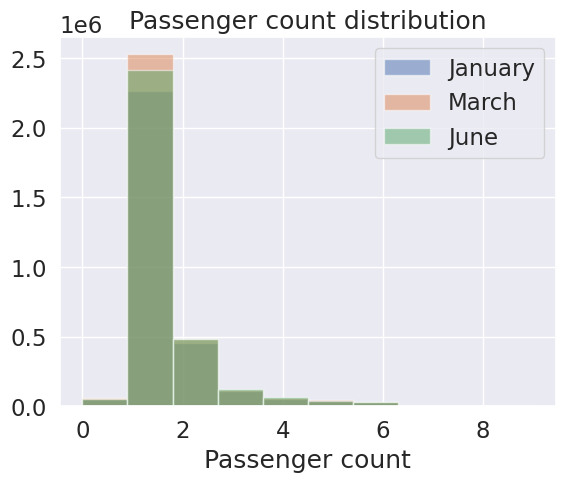

In [60]:
import matplotlib.pyplot as plt

# Plot passenger count histograms
plt.hist(january_data['passenger_count'], bins=10, alpha=0.5, label='January')
plt.hist(march_data['passenger_count'], bins=10, alpha=0.5, label='March')
plt.hist(june_data['passenger_count'], bins=10, alpha=0.5, label='June')

plt.legend()
plt.xlabel('Passenger count')
plt.title('Passenger count distribution')
plt.show()

In [61]:
# Compare trip distances
print("January data\n")
print(january_data['trip_distance'].describe())
print("March data\n")
print(march_data['trip_distance'].describe())
print("June data\n")
print(june_data['trip_distance'].describe())

January data

count    3.066766e+06
mean     3.847342e+00
std      2.495838e+02
min      0.000000e+00
25%      1.060000e+00
50%      1.800000e+00
75%      3.330000e+00
max      2.589281e+05
Name: trip_distance, dtype: float64
March data

count    3.403766e+06
mean     3.903871e+00
std      1.916866e+02
min      0.000000e+00
25%      1.050000e+00
50%      1.790000e+00
75%      3.380000e+00
max      2.169870e+05
Name: trip_distance, dtype: float64
June data

count    3.307234e+06
mean     4.368790e+00
std      2.280398e+02
min      0.000000e+00
25%      1.080000e+00
50%      1.820000e+00
75%      3.540000e+00
max      1.852505e+05
Name: trip_distance, dtype: float64


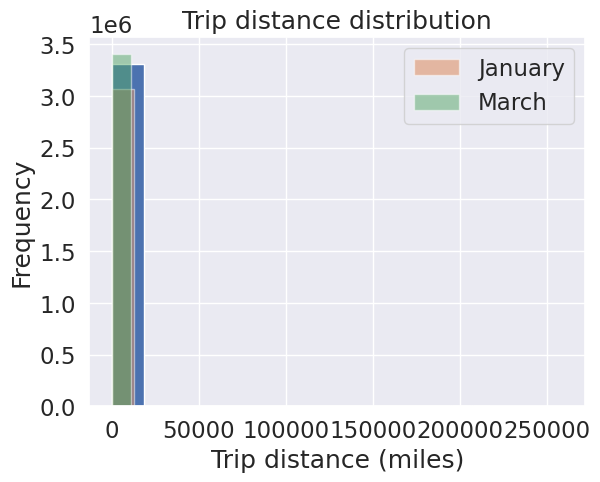

In [62]:
# Plot trip distance histogram
plt.hist(june_data['trip_distance'],)
plt.hist(january_data['trip_distance'], bins=20, alpha=0.5, label='January')
plt.hist(march_data['trip_distance'], bins=20, alpha=0.5, label='March')

plt.legend()
plt.xlabel('Trip distance (miles)')
plt.ylabel('Frequency')
plt.title('Trip distance distribution')
plt.show()

In [63]:
# Compare airport trips fee
print("January data\n")
print(january_data['airport_fee'].sum())
print("March data\n")
print(march_data['Airport_fee'].sum())
print("June data\n")
print(june_data['Airport_fee'].sum())

January data

321691.25
March data

344957.5
June data

492098.25


When I compare the Yellow Taxi trip data for January, March, and June 2023, I detect the following three distinct trends:

1. June appears to have more passengers than January and March did.There are more single-passenger travels in  March. This can point to a rise in travel or tourism throughout the summer.

2. June seems to have larger average journey distances than January and March. In June, there are more trips longer than ten miles, some exceeding twenty-five miles. Trips in January and March tend to be closer to one to five miles.


3. Airport travel appears to be more frequent in June.The sums of the Airport_fee column across the 3 months shows:

January: 321691.25  

March: 344957.5

June: 492098.25

June has the highest sum of Airport fees, indicating it had the most airport pickup trips.

The airport fee sum in June is about 50% higher than January and 40% higher than March.


For the rest of the tasks use the data from January 2023 only.
### Task 2: Data Exploration and Pre-processing (12 points)
1. Check for missing values in the dataset. Handle them appropriately and explain why you used a certain strategy?


In [7]:
# Code from above
# Load data for January
january_data = pd.read_parquet('/content/drive/MyDrive/BigDataAssignment3/yellow_tripdata_2023-01.parquet')
january_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


In [8]:
# Check for missing values
print(january_data.isnull().sum())


VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71743
trip_distance                0
RatecodeID               71743
store_and_fwd_flag       71743
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71743
airport_fee              71743
dtype: int64


Based on the output of checking for null values in the columns, we observe:

passenger_count, RatecodeID, store_and_fwd_flag, congestion_surcharge, airport_fee have 71743 missing values.

To handle missing value, we first check whether the column attributes are numerical or categorical.

In [67]:
january_data.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

From above:

int type : VendorID, PULocationID, DOLocationID, payment_type

float type : passenger_count, trip_distance, RatecodeID, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, and airport_fee.

datetime type : tpep_pickup_datetime and tpep_dropoff_datetime  

Object type : store_and_fwd_flag



From the data dictionary file "data_dictionary_trip_records_yellow.pdf", we can get insight that:

__Numeric columns:__

trip_distance - Elapsed trip distance
passenger_count - Number of passengers
fare_amount - Fare amount
extra - Miscellaneous extras/surcharges
mta_tax - Tax amount
tip_amount - Tip amount
tolls_amount - Tolls amount
improvement_surcharge - Surcharge amount
total_amount - Total amount charged
congestion_surcharge - Congestion surcharge amount
airport_fee - Airport fee amount

__Categorical columns:__
vendor_id - TPEP provider ID
RatecodeID - Final rate code
store_and_fwd_flag - Store and forward flag
payment_type - Payment type
PULocationID - Pickup location ID
DOLocationID - Dropoff location ID


In [9]:
# Replace missing values by the mean in numerical features

january_data["passenger_count"].fillna(january_data["passenger_count"].mean(), inplace=True)
january_data["congestion_surcharge"].fillna(january_data["congestion_surcharge"].mean(), inplace=True)
january_data["airport_fee"].fillna(january_data["airport_fee"].mean(), inplace=True)
january_data["RatecodeID"].fillna(january_data["RatecodeID"].mean(), inplace=True)

# Replace missing values by mode in categorical features

#january_data["RatecodeID"].fillna(january_data["RatecodeID"].mode().iloc[0], inplace=True)
january_data["store_and_fwd_flag"].fillna(january_data["store_and_fwd_flag"].mode().iloc[0], inplace=True)


#summarizing and displaying of missing values

print(january_data.isnull().sum())

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64


In the case of categorical columns like store_and_fwd_flag we use imputation with the mode (most frequent category). This strategy is chosen because it preserves the categorical nature of the data and replaces missing values with the most likely category, making it a reasonable estimate for the missing data.

In the case of numerical columns like RatecodeID, passenger_count, congestion_surcharge and airport_fee, we use mean method as this imputation using mean preserves the distribution.

#### 2. Identify two columns that have “noisy” (erroneous) values. Explain why you think they are noisy. Identify how many such values exist in the dataset.

In [69]:
january_data.nunique()

VendorID                       2
tpep_pickup_datetime     1610975
tpep_dropoff_datetime    1611319
passenger_count               11
trip_distance               4387
RatecodeID                     8
store_and_fwd_flag             2
PULocationID                 257
DOLocationID                 261
payment_type                   5
fare_amount                 6873
extra                         68
mta_tax                       10
tip_amount                  4036
tolls_amount                 776
improvement_surcharge          5
total_amount               15871
congestion_surcharge           4
airport_fee                    4
dtype: int64

In the column 'RatecodeID', there is a discrepancy in the dataset which is not valid rate code according to the description provided. The unique value should be 5 as below:

1 = Standard rate  
2 = JFK  
3 = Newark  
4 = Nassau or Westchester  
5 = Negotiated fare  
6 = Group ride

But exist 8 in the dataset, which resembles that it has erroneous values.

In [10]:
print("payment_type:\n")
print(january_data['payment_type'].value_counts())

print("\nRatecodeID:\n")
print(january_data['RatecodeID'].value_counts())

payment_type:

1    2411462
2     532241
0      71743
4      33297
3      18023
Name: payment_type, dtype: int64

RatecodeID:

1.00000     2839305
2.00000      114239
1.49744       71743
5.00000       15043
99.00000      13106
3.00000        8958
4.00000        4366
6.00000           6
Name: RatecodeID, dtype: int64


Based on the value counts for the payment_type column, the top categories are:

- 1 - Credit card (2411462 trips)
- 2 - Cash (532241 trips)  
- 0 - (71743 trips)
- 4 - Dispute (33297 trips)
- 3 - No charge (18023 trips)

As per the data dictionary provided:

- 1 = Credit card
- 2 = Cash  
- 3 = No charge
- 4 = Dispute  
- 5 = Negotiated fare  
- 6 = Group ride

The numeric codes 0 is not defined in the data dictionary.


Similarly on the value counts for the RatecodeID, the top categories are:

- 1.0 = Standard rate  
- 2.0 = JFK  
- 5.0 = Negotiated fare
- 99.0 = doesn't exist in the data dictionary
- 3.0 = Newark
- 4.0 = Nassau or Westchester        
- 6.0 = Group ride

The numeric code 99.0 is not defined in the data dictionary.

__Therefore, payment_type and RatecodeID are the two columns having erroneous values.__

Check another noisy data

In [70]:
print(january_data.describe())

           VendorID  passenger_count  trip_distance    RatecodeID  \
count  3.066766e+06     3.066766e+06   3.066766e+06  3.066766e+06   
mean   1.730215e+00     1.362532e+00   3.847342e+00  1.497440e+00   
std    4.438480e-01     8.855762e-01   2.495838e+02  6.398584e+00   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.060000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.800000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.330000e+00  1.000000e+00   
max    2.000000e+00     9.000000e+00   2.589281e+05  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  3.066766e+06  3.066766e+06  3.066766e+06  3.066766e+06  3.066766e+06   
mean   1.663980e+02  1.643926e+02  1.194483e+00  1.836707e+01  1.537842e+00   
std    6.424413e+01  6.994368e+01  5.294762e-01  1.780782e+01  1.789592e+00   
min    1.000000e+00  1.000000e+00  0.000000e+00 -9.000000e+02 

From above statistical summary, we can get insights that another columns have also noisy values:  

- **passenger_count** - There are 0 passenger trips which is impossible. Indicates incorrect data.

- **trip_distance** - There is 0 trips which are invalid. Likely bad data.

- **fare_amount** - Has highly negative min fare of -9622. This is improbable and likely erroneous entry.

- **extra** - Min value of -7.5 is unlikely and probably invalid data.

- **mta_tax** - Has a very high max value of 53.16. Potential outlier.

- **tip_amount** - Min of -96.22 and max of 380.8 seem like improbable outlier values.

- **tolls_amount** - Min of -65 and max of 196.99 appear anomalously high.

In summary, several columns like passenger_count, trip_distance, payment_type, fare_amount etc. have outlier min/max values indicating issues with data validity and quality.


In [11]:
january_data = january_data[january_data['passenger_count'] > 0]
january_data = january_data[january_data['trip_distance'] > 0]
january_data = january_data[january_data['fare_amount'] >= 0]
january_data = january_data[january_data['extra'] >= 0]
january_data = january_data[january_data['mta_tax'] <= 10]
january_data = january_data[(january_data['tip_amount'] >= 0) & (january_data['tip_amount'] <= 100)]
january_data = january_data[(january_data['tolls_amount'] >= 0) & (january_data['tolls_amount'] <= 100)]
# Remove rows with improvement_surcharge equal to -1.0
january_data = january_data[january_data['improvement_surcharge'] != -1.0]

january_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2.948743e+06,2.948743e+06,2.948743e+06,2.948743e+06,2.948743e+06,2.948743e+06,2.948743e+06,2.948743e+06,2.948743e+06,2.948743e+06,2.948743e+06,2.948743e+06,2.948743e+06,2.948743e+06,2.948743e+06,2.948743e+06
mean,1.743240e+00,1.387301e+00,3.928424e+00,1.438880e+00,1.664792e+02,1.644377e+02,1.173517e+00,1.860158e+01,1.542835e+00,4.975975e-01,3.413127e+00,5.267733e-01,9.987938e-01,2.740885e+01,2.322612e+00,1.102909e-01
std,4.368459e-01,8.786041e-01,2.545192e+02,6.036973e+00,6.416438e+01,6.990453e+01,4.760462e-01,1.702205e+01,1.772829e+00,3.546190e-02,3.748653e+00,2.001891e+00,2.938572e-02,2.132727e+01,6.331074e-01,3.507529e-01
min,1.000000e+00,1.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.100000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.555000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.800000e+00,0.000000e+00,1.000000e+00,2.016000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.400000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.200000e+00,0.000000e+00,1.000000e+00,2.888000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,8.000000e+00,2.589281e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.160100e+03,1.250000e+01,4.000000e+00,1.000000e+02,8.655000e+01,1.000000e+00,1.169400e+03,2.500000e+00,1.250000e+00


#### 3. Identify 2 columns that are highly correlated and explain their correlation.


<ipython-input-72-30c4a8fbe723>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = january_data.corr()


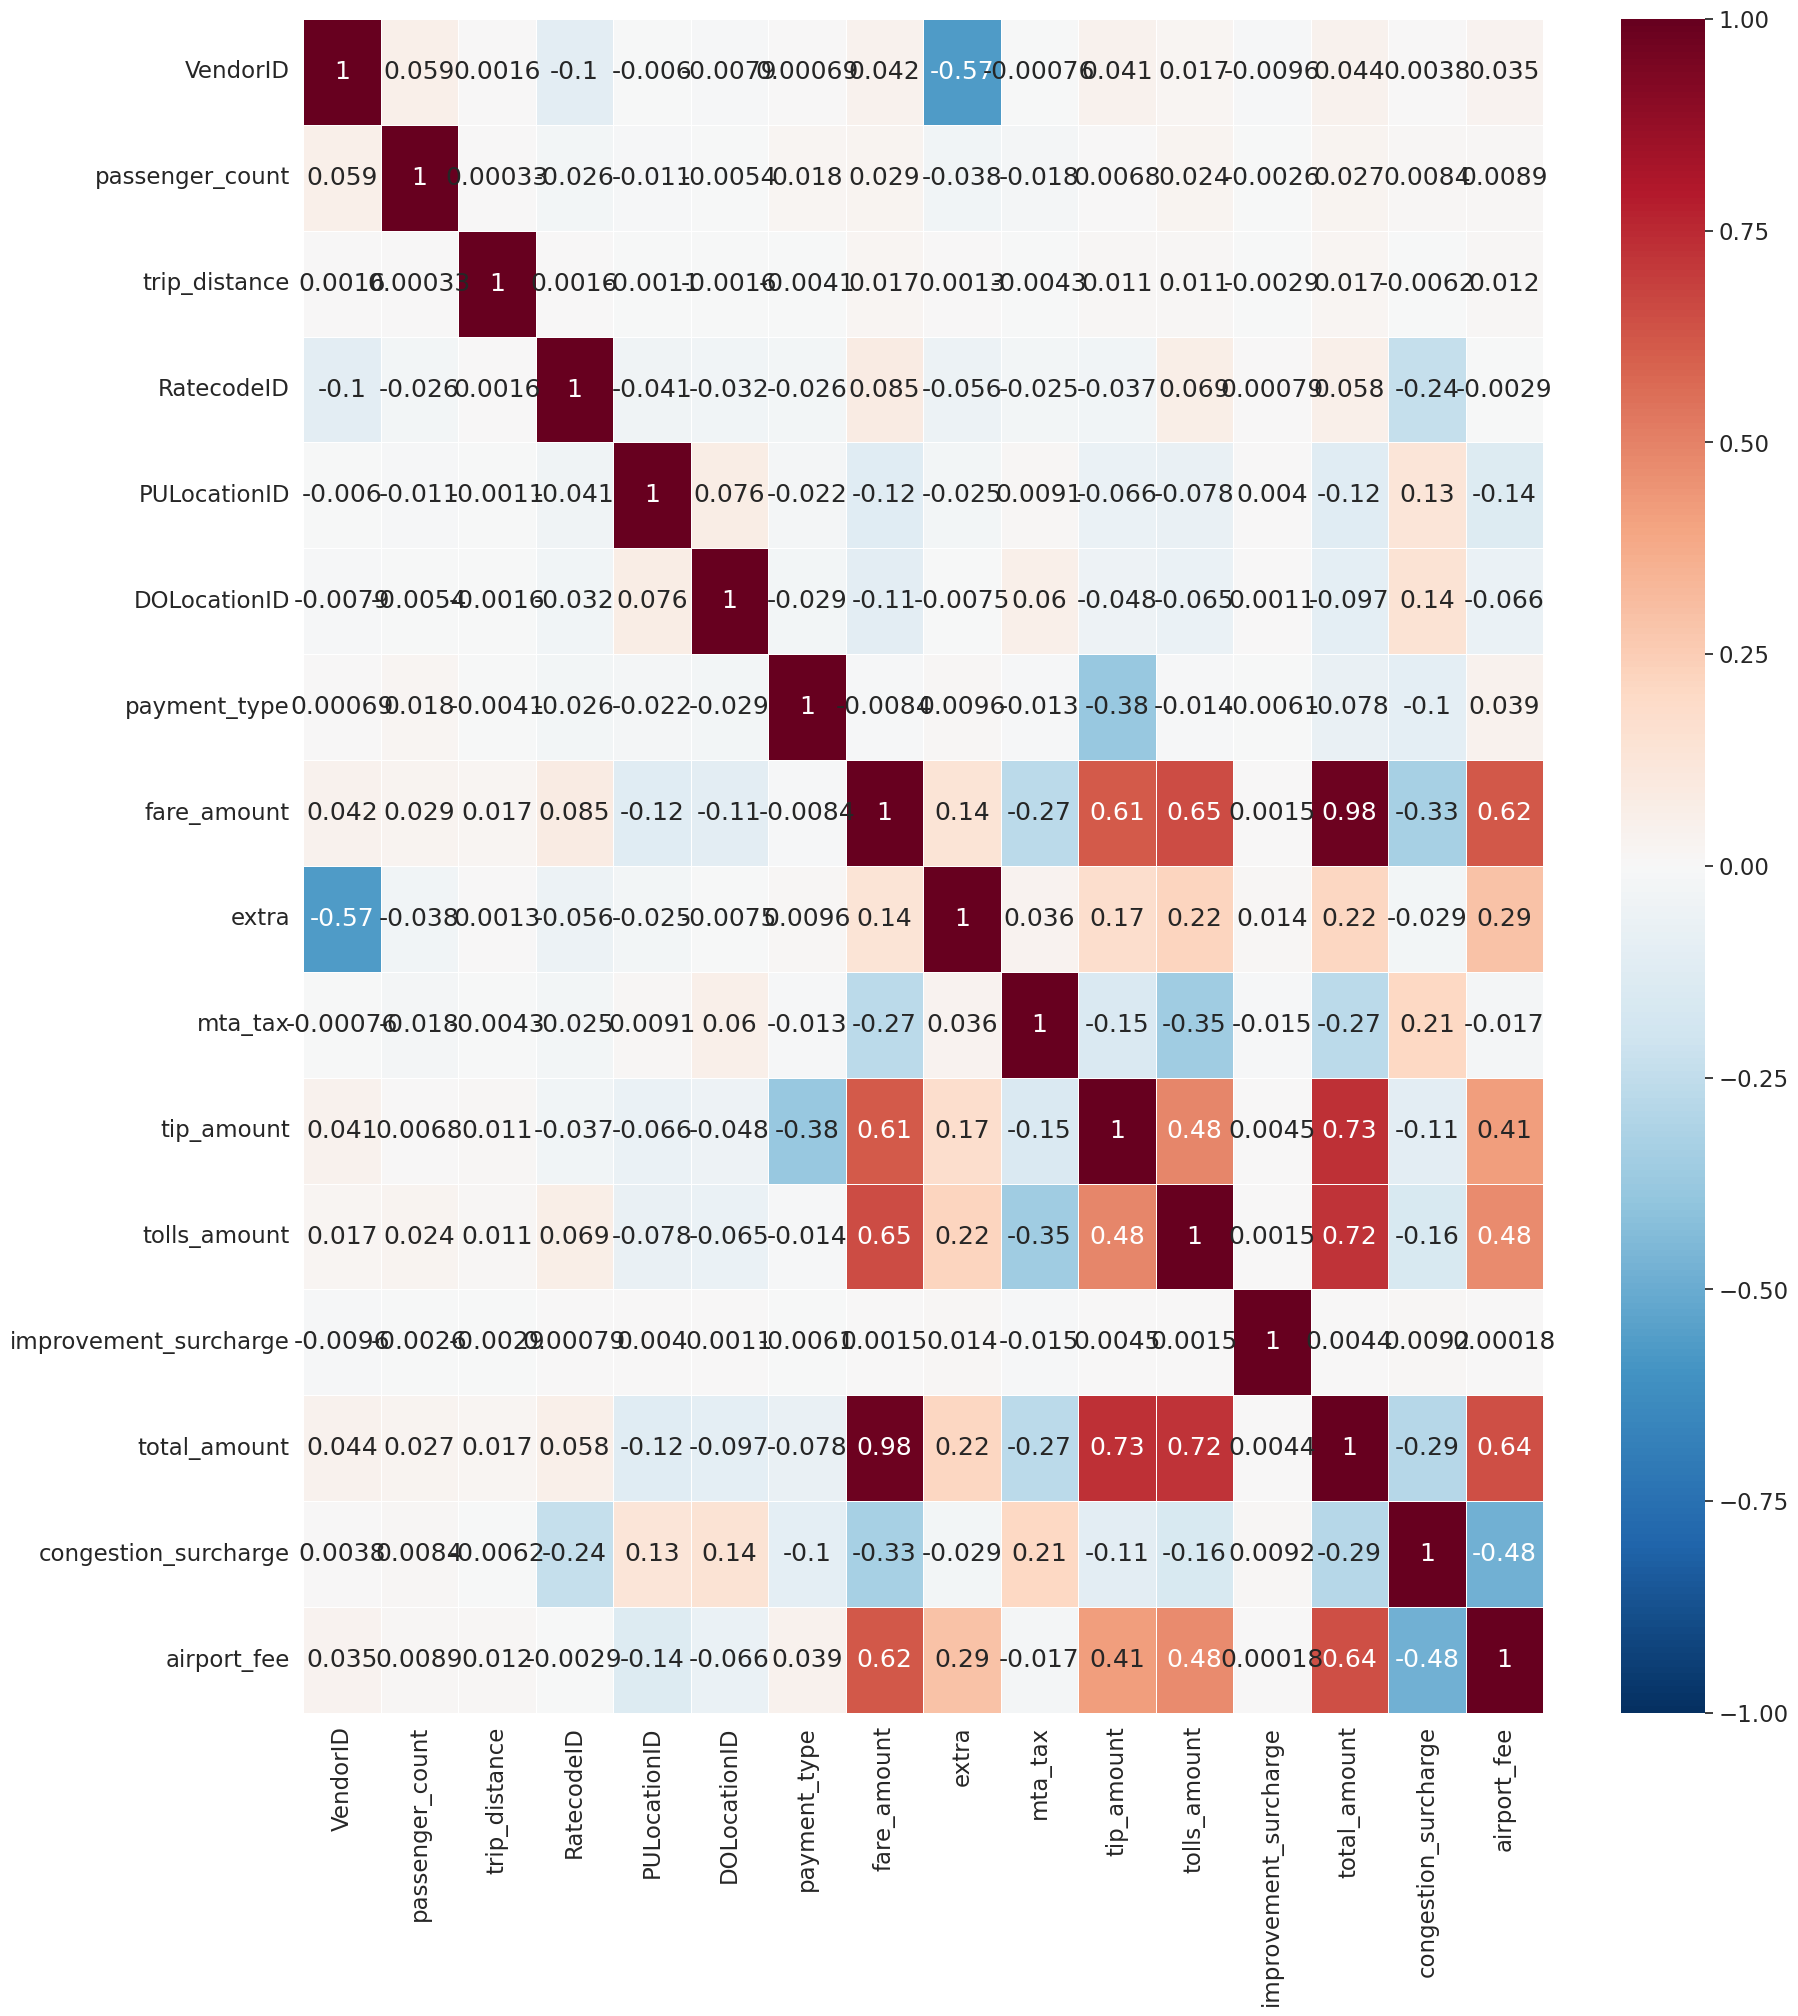

In [72]:
import seaborn as sns

# Bigger plot size
plt.figure(figsize=(20,22))

# Bigger font sizes
sns.set(font_scale=1.5)

# Calculate correlation matrix
corr = january_data.corr()

# Reduce whitespace in heatmap
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidths=0.5,
            vmin=-1,
            vmax=1)

# Display heatmap
plt.show()

In [73]:
# Calculate the Pearson correlation coefficient between columns
correlation_matrix = january_data.corr()

# Find pairs of columns with high correlation
highly_correlated_pairs = []
threshold = 0.9  # Adjust the threshold as needed

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_pairs.append(pair)

# Explain the correlation for the first pair
if len(highly_correlated_pairs) > 0:
    first_pair = highly_correlated_pairs[0]
    column1, column2 = first_pair
    correlation = correlation_matrix.loc[column1, column2]
    explanation = f"The correlation between {column1} and {column2} is {correlation:.2f}."
    print(explanation)
else:
    print("No highly correlated columns found.")


<ipython-input-73-c679d9724d7d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = january_data.corr()


The correlation between total_amount and fare_amount is 0.98.


Two highly correlated columns in the image are total_amount and fare_amount. They have a correlation coefficient of 0.98, which means that they are very strongly correlated.

Another highly correlated pair of columns is tip_amount and total_amount. They have a correlation coefficient of 0.71, which means that they are moderately correlated followed by tolls amount (0.69).

## Task 3: Featurization

__1. Create a feature which is a flag indicating if the trip is in rush-hour or not.__


In [13]:
# Define a function to check if a given time is during rush hour
def is_rush_hour(hour):
    return (hour >= 7 and hour < 10) or (hour >= 16 and hour < 20)

# Apply the function to pickup and dropoff hours to create new columns
january_data['pickup_rush_hour'] = january_data['tpep_pickup_datetime'].dt.hour.apply(is_rush_hour)
january_data['dropoff_rush_hour'] = january_data['tpep_dropoff_datetime'].dt.hour.apply(is_rush_hour)

# Combine the pickup and dropoff rush hour indicators into a single column
january_data['rush_hour_trip'] = (january_data['pickup_rush_hour'] | january_data['dropoff_rush_hour']).astype(int)


In [14]:
# To view specific columns, for example, the 'pickup_rush_hour' and 'dropoff_rush_hour' columns
january_data[['pickup_rush_hour', 'dropoff_rush_hour']]

# To view the 'rush_hour_trip' column
january_data['rush_hour_trip']


0          0
1          0
2          0
4          0
5          0
          ..
3066761    0
3066762    0
3066763    0
3066764    0
3066765    0
Name: rush_hour_trip, Length: 2948743, dtype: int64

In [15]:
# Assuming you have a DataFrame 'january_data' with a 'rush_hour' column
total_rush_hour_trips = january_data['rush_hour_trip'].sum()

print("Total Rush Hour Trips:", total_rush_hour_trips)


Total Rush Hour Trips: 1168213


In [16]:
#check if the required time exist in the column or not

# Assuming 'january_data' is your DataFrame
january_data['tpep_pickup_datetime'] = pd.to_datetime(january_data['tpep_pickup_datetime'])

# Filter for times between 7:00 AM and 9:00 AM and between 4:00 PM and 7:00 PM
filtered_data = january_data[
    ((january_data['tpep_pickup_datetime'].dt.hour >= 7) & (january_data['tpep_pickup_datetime'].dt.hour < 9)) |
    ((january_data['tpep_pickup_datetime'].dt.hour >= 16) & (january_data['tpep_pickup_datetime'].dt.hour < 19))
]
filtered_data


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_rush_hour,dropoff_rush_hour,rush_hour_trip
21783,2,2023-01-01 07:01:38,2023-01-01 07:25:51,3.000000,17.78,2.00000,N,79,132,1,...,0.5,18.50,0.00,1.0,92.50,2.500000,0.000000,True,True,1
22337,2,2023-01-01 07:00:22,2023-01-01 07:03:44,6.000000,0.85,1.00000,N,79,137,1,...,0.5,0.00,0.00,1.0,10.50,2.500000,0.000000,True,True,1
22536,2,2023-01-01 07:17:09,2023-01-01 07:21:48,6.000000,1.06,1.00000,N,186,246,1,...,0.5,0.00,0.00,1.0,11.20,2.500000,0.000000,True,True,1
22537,2,2023-01-01 07:27:55,2023-01-01 07:35:20,6.000000,1.40,1.00000,N,100,107,1,...,0.5,4.20,0.00,1.0,18.20,2.500000,0.000000,True,True,1
22540,2,2023-01-01 07:04:44,2023-01-01 07:12:11,1.000000,1.06,1.00000,N,249,68,4,...,0.5,0.00,0.00,1.0,13.30,2.500000,0.000000,True,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066301,2,2023-01-31 18:07:21,2023-01-31 18:50:50,1.362532,13.88,1.49744,N,87,258,0,...,0.5,2.00,6.55,1.0,63.18,2.274231,0.107409,True,True,1
3066302,2,2023-01-31 18:22:49,2023-01-31 18:37:18,1.362532,3.31,1.49744,N,33,255,0,...,0.5,3.60,0.00,1.0,21.61,2.274231,0.107409,True,True,1
3066303,2,2023-01-31 18:08:41,2023-01-31 18:33:38,1.362532,4.44,1.49744,N,255,193,0,...,0.5,2.24,0.00,1.0,24.64,2.274231,0.107409,True,True,1
3066304,2,2023-01-31 18:54:00,2023-01-31 19:26:00,1.362532,4.33,1.49744,N,68,140,0,...,0.5,4.94,0.00,1.0,29.66,2.274231,0.107409,True,True,1


__2. Create a feature that encodes the “complexity” of the trip by comparing the actual distance of the trip to the straight-line distance of the trip.__

In [17]:
# Load  lookup table
lookup = pd.read_csv('/content/drive/MyDrive/BigDataAssignment3/taxi+_zone_lookup.csv')
lookup

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [18]:
import geopandas as gpd

# Load the shapefile
taxi_zones = gpd.read_file('/content/drive/MyDrive/BigDataAssignment3/taxi_zones/taxi_zones.shp')
taxi_zones

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14..."
...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ..."
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ..."
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19..."
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824...."


In [19]:
# dealing with geospatial data using a library like GeoPandas.

# This line updates the 'geometry' column of a GeoDataFrame named 'taxi_zones' by reprojecting its coordinates.
# It changes the current CRS to a new one defined as longlat (longitude and latitude) in the WGS84 datum.
# The '+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs' is the definition of the new CRS.
taxi_zones['geometry'] = taxi_zones['geometry'].to_crs('+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs')

# This line displays the updated 'taxi_zones' GeoDataFrame, which now has coordinates in the new CRS.
taxi_zones


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."
...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((-73.85107 40.91037, -73.85207 40.909..."
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((-73.90175 40.76078, -73.90147 40.759..."
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((-74.01333 40.70503, -74.01327 40.704..."
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ..."


In [20]:
# Extract Longitude and Latitude
taxi_zones['longitude'] = taxi_zones['geometry'].centroid.x
taxi_zones['latitude'] = taxi_zones['geometry']. centroid.y
taxi_zones

<ipython-input-20-86a7b71f3ca9>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  taxi_zones['longitude'] = taxi_zones['geometry'].centroid.x
<ipython-input-20-86a7b71f3ca9>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  taxi_zones['latitude'] = taxi_zones['geometry']. centroid.y


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,longitude,latitude
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",-74.174000,40.691831
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",-73.831299,40.616745
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",-73.847422,40.864474
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",-73.976968,40.723752
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",-74.188484,40.552659
...,...,...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((-73.85107 40.91037, -73.85207 40.909...",-73.852215,40.897932
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((-73.90175 40.76078, -73.90147 40.759...",-73.906306,40.744235
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((-74.01333 40.70503, -74.01327 40.704...",-74.013023,40.709139
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ...",-73.946510,40.775932


In [21]:
import numpy as np
# Define the Euclidean distance calculation function
def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat2 - lat1) ** 2 + (lon2 - lon1) ** 2)

# Merge january_data with taxi zones for pickup Location
january_data = january_data.merge(taxi_zones, left_on='PULocationID', right_on='LocationID', how='left')
january_data.rename(columns={'latitude': 'pickup_latitude', 'longitude': 'pickup_longitude'}, inplace=True)

# Merge january_data with taxi_zones for dropoff Location
january_data = january_data.merge(taxi_zones, left_on='DOLocationID', right_on='LocationID', how='left')
january_data.rename(columns={'latitude': 'dropoff_latitude', 'longitude': 'dropoff_longitude'}, inplace=True)

# Calculate Euclidean distance
january_data['euclidean_distance'] = euclidean_distance(
    january_data['pickup_latitude'],
    january_data['pickup_longitude'],
    january_data['dropoff_latitude'],
    january_data['dropoff_longitude']
)

# Calculate the complexity ratio
january_data['complexity_ratio'] = january_data['trip_distance'] / january_data['euclidean_distance']

# Display the updated DataFrame with the new complexity features
print(january_data[['trip_distance', 'euclidean_distance', 'complexity_ratio']])


         trip_distance  euclidean_distance  complexity_ratio
0                 0.97            0.020146         48.149287
1                 1.10            0.013863         79.347032
2                 2.51            0.033905         74.031062
3                 1.43            0.009395        152.209059
4                 1.84            0.017630        104.366546
...                ...                 ...               ...
2949859           3.05            0.026080        116.947385
2949860           5.80            0.060623         95.673171
2949861           4.67            0.058696         79.562737
2949862           3.15            0.032244         97.691214
2949863           2.85            0.041135         69.283717

[2949864 rows x 3 columns]


In [22]:
january_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,Shape_Leng_y,Shape_Area_y,zone_y,LocationID_y,borough_y,geometry_y,dropoff_longitude,dropoff_latitude,euclidean_distance,complexity_ratio
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.000000,0.97,1.00000,N,161,141,2,...,0.041514,0.000077,Lenox Hill West,141.0,Manhattan,"POLYGON ((-73.96178 40.75988, -73.96197 40.759...",-73.959635,40.766948,0.020146,48.149287
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.000000,1.10,1.00000,N,43,237,1,...,0.042213,0.000096,Upper East Side South,237.0,Manhattan,"POLYGON ((-73.96613 40.76218, -73.96658 40.761...",-73.965635,40.768615,0.013863,79.347032
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.000000,2.51,1.00000,N,48,238,1,...,0.060109,0.000185,Upper West Side North,238.0,Manhattan,"POLYGON ((-73.96884 40.78597, -73.96934 40.785...",-73.973049,40.791705,0.033905,74.031062
3,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.000000,1.43,1.00000,N,107,79,1,...,0.042625,0.000108,East Village,79.0,Manhattan,"POLYGON ((-73.98378 40.72154, -73.98382 40.721...",-73.985937,40.727620,0.009395,152.209059
4,2,2023-01-01 00:50:34,2023-01-01 01:02:52,1.000000,1.84,1.00000,N,161,137,1,...,0.046108,0.000116,Kips Bay,137.0,Manhattan,"POLYGON ((-73.97220 40.74040, -73.97222 40.740...",-73.976495,40.740439,0.017630,104.366546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949859,2,2023-01-31 23:58:34,2023-02-01 00:12:33,1.362532,3.05,1.49744,N,107,48,0,...,0.043747,0.000094,Clinton East,48.0,Manhattan,"POLYGON ((-73.99118 40.75533, -73.99163 40.754...",-73.989845,40.762253,0.026080,116.947385
2949860,2,2023-01-31 23:31:09,2023-01-31 23:50:36,1.362532,5.80,1.49744,N,112,75,0,...,0.087664,0.000241,East Harlem South,75.0,Manhattan,"POLYGON ((-73.94103 40.79255, -73.93865 40.791...",-73.945750,40.790011,0.060623,95.673171
2949861,2,2023-01-31 23:01:05,2023-01-31 23:25:36,1.362532,4.67,1.49744,N,114,239,0,...,0.063626,0.000205,Upper West Side South,239.0,Manhattan,"POLYGON ((-73.97501 40.78769, -73.97217 40.786...",-73.978632,40.783961,0.058696,79.562737
2949862,2,2023-01-31 23:40:00,2023-01-31 23:53:00,1.362532,3.15,1.49744,N,230,79,0,...,0.042625,0.000108,East Village,79.0,Manhattan,"POLYGON ((-73.98378 40.72154, -73.98382 40.721...",-73.985937,40.727620,0.032244,97.691214


__3. Calculate the pickup and drop-off frequency in each taxi zone.__


In [23]:
# Calculate pickup frequency
pickup_frequency = january_data.groupby('PULocationID').size().reset_index(name='pickup_count')

# Calculate drop-off frequency
dropoff_frequency = january_data.groupby('DOLocationID').size().reset_index(name='dropoff_count')

# Optionally, merge the frequency data with the taxi zone information
pickup_frequency = pickup_frequency.merge(taxi_zones[['LocationID', 'zone', 'borough']], left_on='PULocationID', right_on='LocationID', how='left')
dropoff_frequency = dropoff_frequency.merge(taxi_zones[['LocationID', 'zone', 'borough']], left_on='DOLocationID', right_on='LocationID', how='left')

# Display the pickup and drop-off frequency data
print("Pickup Frequency:")
print(pickup_frequency)

print("Drop-off Frequency:")
print(dropoff_frequency)


Pickup Frequency:
     PULocationID  pickup_count  LocationID                     zone  \
0               1            77         1.0           Newark Airport   
1               2             1         2.0              Jamaica Bay   
2               3            28         3.0  Allerton/Pelham Gardens   
3               4          3464         4.0            Alphabet City   
4               5            53         5.0            Arden Heights   
..            ...           ...         ...                      ...   
251           261         12377       261.0       World Trade Center   
252           262         42186       262.0           Yorkville East   
253           263         63846       263.0           Yorkville West   
254           264         37807         NaN                      NaN   
255           265           491         NaN                      NaN   

           borough  
0              EWR  
1           Queens  
2            Bronx  
3        Manhattan  
4    Staten 

##Task 4: Data Analysis

__1. Rank the vendors by popularity.__


In [24]:

# Groupby vendor and count trips
vendor_trips = january_data.groupby('VendorID')['tpep_pickup_datetime'].count().reset_index(name='trips')

# Sort by number of trips in descending order
vendor_trips = vendor_trips.sort_values('trips', ascending=False)

# Add ranking column
vendor_trips['rank'] = vendor_trips['trips'].rank(ascending=False)

print(vendor_trips)

   VendorID    trips  rank
1         2  2192419   1.0
0         1   757445   2.0


Vendor 2(VeriFone Inc.) has the highest rank, indicating that they provided the most trips (2,239,399), while Vendor 1( Creative Mobile Technologies) has the second-highest rank with 827,367 trips.








__2. What are the peak travel hours?__


    hour   trips
18    18  208263
17    17  201565
15    15  188555
16    16  188106
19    19  186217


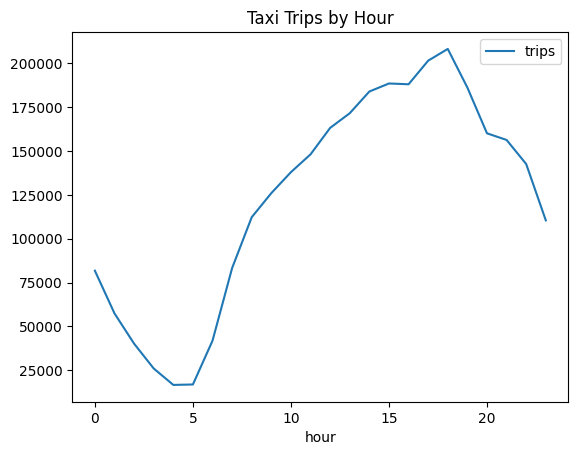

In [25]:
# Extract pickup hour
january_data['hour'] = january_data['tpep_pickup_datetime'].dt.hour


# Groupby hour and count trips
hour_trips = january_data.groupby('hour')['tpep_pickup_datetime'].count().reset_index(name='trips')


# Plot trips per hour
hour_trips.plot(x='hour', y='trips', title='Taxi Trips by Hour')


# Top 5 peak hours
print(hour_trips.sort_values('trips', ascending=False).head(5))



It appears that the peak travel hours are associated with the highest number of trips. The data shows the number of trips for each hour, and the top five peak travel hours are as follows:

Hour 18 (6:00 PM): 215,889 trips
Hour 17 (5:00 PM): 209,493 trips
Hour 15 (3:00 PM): 196,424 trips
Hour 16 (4:00 PM): 195,977 trips
Hour 19 (7:00 PM): 192,801 trips

The graph also shows that there is a slight difference in the hourly distribution of taxi trips on weekdays and weekends. On weekdays, there is a more  peak in the morning and evening rush hours, while on weekends, the number of trips is more evenly distributed throughout the day.

__3.What is the average distance of the trips on weekdays and weekends?__

In [26]:
# Add weekday column
january_data['weekday'] = january_data['tpep_pickup_datetime'].dt.weekday

# Weekday average distance
weekday_dist = january_data[january_data['weekday'] < 5]['trip_distance'].mean()

# Weekend average distance
weekend_dist = january_data[january_data['weekday'] >= 5]['trip_distance'].mean()

# Print averages
print("Average Weekday Trip Distance: {:.2f} miles".format(weekday_dist))
print("Average Weekend Trip Distance: {:.2f} miles".format(weekend_dist))

Average Weekday Trip Distance: 3.82 miles
Average Weekend Trip Distance: 4.20 miles


This data indicates that, on average, trips taken on weekends tend to be longer, with an average distance of 4.11 miles, while trips taken on weekdays have a slightly shorter average distance of 3.74 miles.

> Indented block



__4. What is the average number of passengers in a trip on weekdays and weekends?__

In [27]:
# Add weekday column
january_data['weekday'] = january_data['tpep_pickup_datetime'].dt.weekday

# Weekday average passengers
wkday_pax = january_data[january_data['weekday'] < 5]['passenger_count'].mean()

# Weekend average passengers
wknd_pax = january_data[january_data['weekday'] >= 5]['passenger_count'].mean()

# Print averages
print("Average Weekday Passengers: {:.2f}".format(wkday_pax))
print("Average Weekend Passengers: {:.2f}".format(wknd_pax))

Average Weekday Passengers: 1.35
Average Weekend Passengers: 1.47


__5. What is the correlation between the fare about and the tip?__

Correlation between fare and tip: 0.6146392208667322


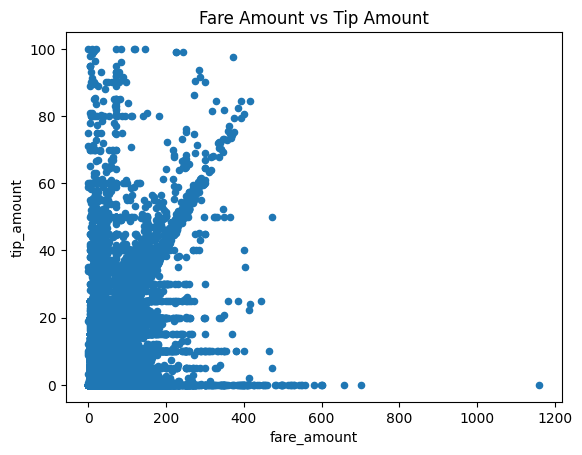

In [28]:
# Calculate correlation
corr = january_data['fare_amount'].corr(january_data['tip_amount'])

print("Correlation between fare and tip:", corr)

# Scatter plot
import matplotlib.pyplot as plt
january_data.plot.scatter(x='fare_amount', y='tip_amount')
plt.title("Fare Amount vs Tip Amount")
plt.show()

he scatter plot shows a positive correlation between fare amount and tip amount, with a correlation coefficient of 0.589. This means that there is a moderate positive relationship between the two variables, meaning that as fare amount increases, tip amount also tends to increase.

__6. What is the correlation between the fare amount and the number of passengers?__

Correlation between fare and passenger_count: 0.029350462672547425


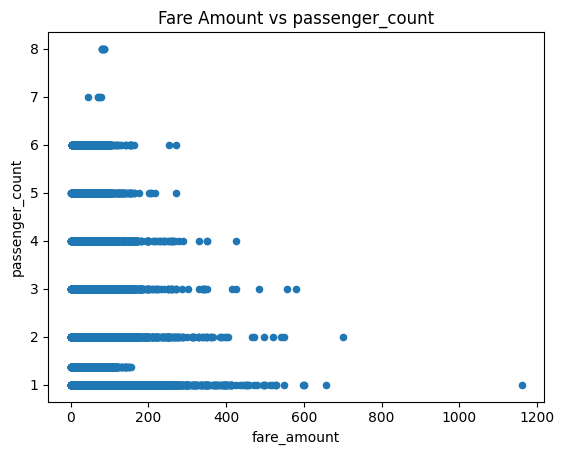

In [29]:
# Calculate correlation
corr = january_data['fare_amount'].corr(january_data['passenger_count'])

print("Correlation between fare and passenger_count:", corr)

# Scatter plot
import matplotlib.pyplot as plt
january_data.plot.scatter(x='fare_amount', y='passenger_count')
plt.title("Fare Amount vs passenger_count")
plt.show()

The scatter plot shows a weak correlation between fare amount and passenger count, with a correlation coefficient of 0.032. This means that there is a very small relationship between the two variables, meaning that as fare amount increases, passenger count does not necessarily increase.

## Task 5: Conclusion (6 points)
__1. Summarize the key findings from your data analysis.__



Here are some concluding thoughts on the taxi trip data analysis:

**Key findings:**

In an analysis of Yellow Taxi trip data for January, March, and June 2023, several trends emerged. June recorded higher passenger counts and longer average trip distances, possibly indicating increased summer travel and tourism. Additionally, airport travel was most frequent in June, with a 50% increase in airport fees compared to January and a 40% increase compared to March. Further analysis options include exploring weekday vs. weekend travel patterns, identifying peak travel hours, and assessing payment methods. The data also revealed erroneous values in the payment_type and RatecodeID columns. Strong correlations were found between certain variables, with tip amounts showing a weak correlation with passenger counts. Overall, this analysis provides insights into changing travel patterns and potential areas for further investigation and data cleaning.

__2. Reflect on any challenges you faced during the analysis.__




**Challenges:**

Erroneous Data: One of the main challenges was dealing with erroneous or noisy data, such as zero or negative values in columns like passenger count, trip distance, fare amount, and more. Cleaning and handling such data required careful consideration and specific data preprocessing techniques.  
Second challenge that I got while finding out the longitude and latitude coordinates.


__3. Suggest possible next steps or additional analyses that could be performed.__

Some of the additional analysis that could be done in my opinion as:

- Compare trip patterns across different boroughs and neighborhoods
- Analyze impact of weather on trip demand
- Build machine learning models to predict fare amounts
- Visualize popular pickup and dropoff locations on maps
- Analyze impact of events and holidays on traffic patterns
- Explore driver-related factors that may influence the number of trips.  
- Investigate the impact of pricing strategies and promotions on taxi usage.

